<a href="https://colab.research.google.com/github/qinzixuan331-bit/Multi-Scenario-Recognition-and-Detection-Model-in-National-Parks-Based-on-Improved-YOLOv8/blob/main/%E7%9B%AE%E6%A0%87%E6%A3%80%E6%B5%8B_YOLOv8_StarNet%2BCGA%2B%E6%8D%9F%E5%A4%B1%E5%87%BD%E6%95%B0%E6%9B%BF%E6%8D%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 环境安装

In [ ]:
!git clone https://github.com/ultralytics/ultralytics.git
%cd ultralytics
# !pip install -r requirements.txt
!pip install -e .


Cloning into 'ultralytics'...
remote: Enumerating objects: 60754, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 60754 (delta 28), reused 28 (delta 15), pack-reused 60701 (from 2)
Receiving objects: 100% (60754/60754), 32.76 MiB | 15.93 MiB/s, done.
Resolving deltas: 100% (45236/45236), done.
/content/ultralytics
Obtaining file:///content/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/6

In [ ]:
!pip install timm

In [ ]:
# !pip install timm==0.6.7
# !pip install einops

In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.6/235.7 GB disk)


# 导入python包

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image
import torch
import torch.nn as nn

# 用预训练模型测试单张图片

## 命令行格式预测

In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

100% 6.25M/6.25M [00:00<00:00, 366MB/s]
Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 107MB/s]
image 1/1 /content/ultralytics/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 80.8ms
Speed: 14.9ms preprocess, 80.8ms inference, 368.2ms postprocess per image at shape (1, 3, 640, 384)
Results saved to /content/ultralytics/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


## Python代码预测

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO('./yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/ultralytics/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 51.6ms
Speed: 2.7ms preprocess, 51.6ms inference, 142.7ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [ ]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

# 下载数据集

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="arxfVvXPJvMTM3TAJ2Ob")
project = rf.workspace("pwd-jztpw").project("farmhouse")
version = project.version(2)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 129.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to farmhouse-2 in yolov8:: 100%|██████████| 986/986 [00:00<00:00, 6821.37it/s]


In [ ]:
dataset.location

'/content/ultralytics/farmhouse-2'

In [ ]:
!cp /content/ultralytics/farmhouse-2/valid/images/* /content/ultralytics/farmhouse-2/train/images/
!cp /content/ultralytics/farmhouse-2/valid/labels/* /content/ultralytics/farmhouse-2/train/labels/

# StarNet模块添加
步骤一：新建/content/ultralytics/ultralytics/nn/modules/StarNet.py
复制下面的代码到py文件中

步骤二： 在task.py文件中导入相应的类


from ultralytics.nn.modules.StarNet import ConvBN, StarBlock

步骤三：task.py文件中加入修改部分

修改点1：和bn layer同一层级

        elif m is StarBlock:
            c1 = ch[f]
            if c2 != nc:  # if c2 not equal to number of classes (i.e. for Classify() output)
                c2 = make_divisible(min(c2, max_channels) * width, 8)
            args = [c1, *args[0:]]
            if m is StarBlock:
                args.insert(2, n)  # number of repeats
                n = 1



In [ ]:
# shell命令新建一个文件 /content/ultralytics/ultralytics/nn/modules/StarNet.py
!touch /content/ultralytics/ultralytics/nn/modules/StarNet.py


## StarNet.py源码

In [ ]:
# !pip install einops

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import torch
import torch.nn as nn
from timm.models.layers import DropPath


# 定义 ConvBN 模块
class ConvBN(nn.Module):
    def __init__(
        self,
        in_planes,
        out_planes,
        kernel_size=1,
        stride=1,
        padding=0,
        groups=1,
        with_bn=True,
    ):
        super(ConvBN, self).__init__()
        self.conv = nn.Conv2d(
            in_planes,
            out_planes,
            kernel_size,
            stride,
            padding,
            groups=groups,
            bias=not with_bn,
        )
        self.with_bn = with_bn
        if with_bn:
            self.bn = nn.BatchNorm2d(out_planes)
            nn.init.constant_(self.bn.weight, 1)
            nn.init.constant_(self.bn.bias, 0)

    def forward(self, x):
        x = self.conv(x)
        if self.with_bn:
            x = self.bn(x)
        return x


# 定义 Block 模块
class StarBlock(nn.Module):
    def __init__(self, dim, mlp_ratio=3, n=1):
        super(StarBlock, self).__init__()
        self.n = n
        drop_path = 0.0
        self.dwconv = ConvBN(dim, dim, 7, 1, (7 - 1) // 2, groups=dim, with_bn=True)
        self.f1 = ConvBN(dim, mlp_ratio * dim, kernel_size=1, with_bn=False)
        self.f2 = ConvBN(dim, mlp_ratio * dim, kernel_size=1, with_bn=False)
        self.g = ConvBN(mlp_ratio * dim, dim, kernel_size=1)
        self.dwconv2 = ConvBN(
            dim, dim, kernel_size=7, padding=3, groups=dim, with_bn=False
        )
        self.act = nn.ReLU6()
        self.drop_path = DropPath(drop_path) if drop_path > 0.0 else nn.Identity()

    def forward(self, x):
        input = x
        for _ in range(self.n):  # 使用循环来重复特定的操作n次
            x = self.dwconv(x)
            x1, x2 = self.f1(x), self.f2(x)
            x = self.act(x1) * x2
            x = self.dwconv2(self.g(x))
        x = input + self.drop_path(x)  # 确保残差连接仅应用一次，而不是n次
        return x


# 定义 StarNet 模块
class StarNet(nn.Module):
    def __init__(
        self,
        base_dim=32,
        depths=[3, 3, 12, 5],
        mlp_ratio=4,
        drop_path_rate=0.0,
        num_classes=1000,
    ):
        super(StarNet, self).__init__()
        self.num_classes = num_classes
        self.in_channel = 32
        self.stem = nn.Sequential(
            ConvBN(3, self.in_channel, kernel_size=3, stride=2, padding=1), nn.ReLU6()
        )

        # 构建阶段
        dpr = [x.item() for x in torch.linspace(0, drop_path_rate, sum(depths))]
        cur = 0

        # 第一阶段
        embed_dim = base_dim * 2**0
        down_sampler1 = ConvBN(
            self.in_channel, embed_dim, kernel_size=3, stride=2, padding=1
        )
        self.in_channel = embed_dim
        blocks1 = [
            StarBlock(self.in_channel, mlp_ratio, dpr[cur + i])
            for i in range(depths[0])
        ]
        cur += depths[0]
        stage1 = nn.Sequential(down_sampler1, *blocks1)

        # 第二阶段
        embed_dim = base_dim * 2**1
        down_sampler2 = ConvBN(
            self.in_channel, embed_dim, kernel_size=3, stride=2, padding=1
        )
        self.in_channel = embed_dim
        blocks2 = [
            StarBlock(self.in_channel, mlp_ratio, dpr[cur + i])
            for i in range(depths[1])
        ]
        cur += depths[1]
        stage2 = nn.Sequential(down_sampler2, *blocks2)

        # 第三阶段
        embed_dim = base_dim * 2**2
        down_sampler3 = ConvBN(
            self.in_channel, embed_dim, kernel_size=3, stride=2, padding=1
        )
        self.in_channel = embed_dim
        blocks3 = [
            StarBlock(self.in_channel, mlp_ratio, dpr[cur + i])
            for i in range(depths[2])
        ]
        cur += depths[2]
        stage3 = nn.Sequential(down_sampler3, *blocks3)

        # 第四阶段
        embed_dim = base_dim * 2**3
        down_sampler4 = ConvBN(
            self.in_channel, embed_dim, kernel_size=3, stride=2, padding=1
        )
        self.in_channel = embed_dim
        blocks4 = [
            StarBlock(self.in_channel, mlp_ratio, dpr[cur + i])
            for i in range(depths[3])
        ]
        cur += depths[3]
        stage4 = nn.Sequential(down_sampler4, *blocks4)

        self.stages = nn.ModuleList([stage1, stage2, stage3, stage4])
        # 分类头
        self.norm = nn.BatchNorm2d(self.in_channel)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.head = nn.Linear(self.in_channel, num_classes)
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode="fan_out", nonlinearity="relu")
            elif isinstance(m, (nn.BatchNorm2d, nn.LayerNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.stem(x)
        for stage in self.stages:
            x = stage(x)
        x = self.avgpool(self.norm(x))
        x = torch.flatten(x, 1)
        return self.head(x)


# # 使用示例
# if __name__ == "__main__":
#     model = StarNet(
#         base_dim=32,
#         depths=[3, 3, 12, 5],
#         mlp_ratio=4,
#         drop_path_rate=0.1,
#         num_classes=1000,
#     )
#     input_tensor = torch.randn(1, 3, 224, 224)  # 创建一个随机输入张量
#     output = model(input_tensor)  # 前向传播
#     print(output.shape)  # 输出分类结果



# 特征融合模块
步骤一：新建/content/ultralytics/ultralytics/nn/modules/CGAFusion.py
复制下面的代码到py文件中

步骤二： 在task.py文件中导入相应的类
from ultralytics.nn.modules.CGAFusion import CGAFusion

步骤三：task.py文件中加入融合修改部分 和Concat类并列


        elif m is CGAFusion:
            c2 = sum([ch[x] for x in f])//2

In [ ]:
        elif m is CGAFusion:
            c2 = sum([ch[x] for x in f])//2


In [ ]:
!touch /content/ultralytics/ultralytics/nn/modules/CGAFusion.py

In [ ]:
!pip install einops

## CGAFusion.py源码

In [ ]:

import torch
from torch import nn
from einops.layers.torch import Rearrange

__all__ = "CGAFusion"


class SpatialAttention(nn.Module):
    def __init__(self):
        super(SpatialAttention, self).__init__()
        self.sa = nn.Conv2d(2, 1, 7, padding=3, padding_mode="reflect", bias=True)

    def forward(self, x):
        x_avg = torch.mean(x, dim=1, keepdim=True)
        x_max, _ = torch.max(x, dim=1, keepdim=True)
        x2 = torch.cat([x_avg, x_max], dim=1)
        sattn = self.sa(x2)
        return sattn


class ChannelAttention(nn.Module):
    def __init__(self, dim, reduction=8):
        super(ChannelAttention, self).__init__()
        self.gap = nn.AdaptiveAvgPool2d(1)
        self.ca = nn.Sequential(
            nn.Conv2d(dim, dim // reduction, 1, padding=0, bias=True),
            nn.ReLU(inplace=True),
            nn.Conv2d(dim // reduction, dim, 1, padding=0, bias=True),
        )

    def forward(self, x):
        x_gap = self.gap(x)
        cattn = self.ca(x_gap)
        return cattn


class PixelAttention(nn.Module):
    def __init__(self, dim):
        super(PixelAttention, self).__init__()
        self.pa2 = nn.Conv2d(
            2 * dim, dim, 7, padding=3, padding_mode="reflect", groups=dim, bias=True
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x, pattn1):
        B, C, H, W = x.shape
        x = x.unsqueeze(dim=2)  # B, C, 1, H, W
        pattn1 = pattn1.unsqueeze(dim=2)  # B, C, 1, H, W
        x2 = torch.cat([x, pattn1], dim=2)  # B, C, 2, H, W
        x2 = Rearrange("b c t h w -> b (c t) h w")(x2)
        pattn2 = self.pa2(x2)
        pattn2 = self.sigmoid(pattn2)
        return pattn2


class CGAFusion(nn.Module):
    def __init__(self, dim, reduction=8):
        super(CGAFusion, self).__init__()
        self.a = 0.5
        self.sa = SpatialAttention()
        self.ca = ChannelAttention(dim, reduction)
        self.pa = PixelAttention(dim)
        self.conv = nn.Conv2d(dim, dim, 1, bias=True)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x1, x2 = x[0], x[1]
        # print(x1.shape)
        # print(x2.shape)
        initial = torch.add(x1, x2, alpha=self.a)
        # print(initial.shape)

        cattn = self.ca(initial)
        # print(f"cattn is {cattn.shape}")
        sattn = self.sa(initial)
        # print(f"sattn is {sattn.shape}")

        pattn1 = sattn + cattn
        pattn2 = self.sigmoid(self.pa(initial, pattn1))
        result = initial + pattn2 * x1 + (1 - pattn2) * x2
        result = self.conv(result)
        return result



# yaml文件

In [ ]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

## starnet.yaml

In [ ]:
%%writetemplate /content/ultralytics/yolov8-StarNet.yaml

nc: 80 # number of classes
scales: # model compound scaling constants, i.e. 'model=yolov8n.yaml' will call yolov8.yaml with scale 'n'
  # [depth, width, max_channels]
  # n: [0.33, 0.25, 1024]
  # s: [0.33, 0.50, 1024]
  # m: [0.67, 0.75, 768]
  l: [1.00, 1.00, 512]
  x: [1.00, 1.25, 512]

# YOLOv8.0n backbone
backbone:
  # [from, repeats, module, args]
  - [-1, 1, Conv, [32, 3, 2]] # 0-P1/2
  - [-1, 1, Conv, [32, 3, 2]] # 1-P2/4
  - [-1, 3, StarBlock, [4]]
  - [-1, 1, Conv, [64, 3, 2]] # 3-P3/8
  - [-1, 3, StarBlock, [4]]
  - [-1, 1, Conv, [128, 3, 2]] # 5-P4/16
  - [-1, 12, StarBlock, [4]]
  - [-1, 1, Conv, [256, 3, 2]] # 7-P5/32
  - [-1, 5, StarBlock, [4]]
  - [-1, 1, SPPF, [256, 5]] # 9

# YOLOv8.0n head
head:
  - [-1, 1, nn.Upsample, [None, 2, "nearest"]]
  - [[-1, 6], 1, Concat, [1]] # cat backbone P4
  - [-1, 3, C2f, [128]] # 12

  - [-1, 1, nn.Upsample, [None, 2, "nearest"]]
  - [[-1, 4], 1, Concat, [1]] # cat backbone P3
  - [-1, 3, C2f, [64]] # 15 (P3/8-small)

  - [-1, 1, Conv, [64, 3, 2]]
  - [[-1, 12], 1, Concat, [1]] # cat head P4
  - [-1, 3, C2f, [128]] # 18 (P4/16-medium)

  - [-1, 1, Conv, [128, 3, 2]]
  - [[-1, 9], 1, Concat, [1]] # cat head P5
  - [-1, 3, C2f, [256]] # 21 (P5/32-large)

  - [[15, 18, 21], 1, Detect, [nc]] # Detect(P3, P4, P5)



## cgaf.yaml

In [ ]:
%%writetemplate /content/ultralytics/yolov8-CGAF.yaml
nc: 80
scales:
  # [depth, width, max_channels]
  n: [0.33, 0.25, 1024]
  s: [0.33, 0.50, 1024]
  m: [0.67, 0.75, 768]
  l: [1.00, 1.00, 512]
  x: [1.00, 1.25, 512]

# YOLOv8.0n backbone
backbone:
  # [from, repeats, module, args]
  - [-1, 1, Conv, [64, 3, 2]] # 0-P1/2
  - [-1, 1, Conv, [128, 3, 2]] # 1-P2/4
  - [-1, 3, C2f, [128, True]]
  - [-1, 1, Conv, [256, 3, 2]] # 3-P3/8
  - [-1, 6, C2f, [256, True]]
  - [-1, 1, Conv, [512, 3, 2]] # 5-P4/16
  - [-1, 6, C2f, [512, True]]
  - [-1, 1, Conv, [512, 3, 2]] # 7-P5/32
  - [-1, 3, C2f, [512, True]]
  - [-1, 1, SPPF, [512, 5]] # 9

# YOLOv8.0n head
head:
  - [-1, 1, nn.Upsample, [None, 2, "nearest"]]
  - [[-1, 6], 1, CGAFusion, [128]] # cat backbone P4
  - [-1, 3, C2f, [256]] # 12

  - [-1, 1, nn.Upsample, [None, 2, "nearest"]]
  - [[-1, 4], 1, CGAFusion, [64]] # cat backbone P3
  - [-1, 3, C2f, [256]] # 15 (P3/8-small)

  - [-1, 1, Conv, [256, 3, 2]]
  - [[-1, 12], 1, CGAFusion, [64]] # cat head P4
  - [-1, 3, C2f, [512]] # 18 (P4/16-medium)

  - [-1, 1, Conv, [512, 3, 2]]
  - [[-1, 9], 1, CGAFusion, [128]] # cat head P5
  - [-1, 3, C2f, [1024]] # 21 (P5/32-large)

  - [[15, 18, 21], 1, Detect, [nc]] # Detect(P3, P4, P5)


## starnet+cgaf.yaml

In [ ]:
%%writetemplate /content/ultralytics/yolov8-StarNet+CGAF.yaml

nc: 80 # number of classes
scales: # model compound scaling constants, i.e. 'model=yolov8n.yaml' will call yolov8.yaml with scale 'n'
  # [depth, width, max_channels]
  # n: [0.33, 0.25, 1024]
  # s: [0.33, 0.50, 1024]
  # m: [0.67, 0.75, 768]
  l: [0.33, 1.00, 512]
  x: [1.00, 1.25, 512]

# YOLOv8.0n backbone
backbone:
  # [from, repeats, module, args]
  - [-1, 1, Conv, [32, 3, 2]] # 0-P1/2
  - [-1, 1, Conv, [32, 3, 2]] # 1-P2/4
  - [-1, 3, StarBlock, [2]]
  - [-1, 1, Conv, [64, 3, 2]] # 3-P3/8
  - [-1, 3, StarBlock, [2]]
  - [-1, 1, Conv, [256, 3, 2]] # 5-P4/16
  - [-1, 12, StarBlock, [2]]
  - [-1, 1, Conv, [256, 3, 2]] # 7-P5/32
  - [-1, 5, StarBlock, [2]]
  - [-1, 1, SPPF, [256, 5]] # 9

# YOLOv8.0n head
head:
  - [-1, 1, nn.Upsample, [None, 2, "nearest"]]
  - [[-1, 6], 1, CGAFusion, [256]] # cat backbone P4
  - [-1, 3, C2f, [64]] # 12

  - [-1, 1, nn.Upsample, [None, 2, "nearest"]]
  - [[-1, 4], 1, CGAFusion, [64]] # cat backbone P3
  - [-1, 3, C2f, [64]] # 15 (P3/8-small)

  - [-1, 1, Conv, [64, 3, 2]]
  - [[-1, 12], 1, Concat, [1]] # cat head P4
  - [-1, 3, C2f, [128]] # 18 (P4/16-medium)

  - [-1, 1, Conv, [128, 3, 2]]
  - [[-1, 9], 1, Concat, [1]] # cat head P5
  - [-1, 3, C2f, [256]] # 21 (P5/32-large)

  - [[15, 18, 21], 1, Detect, [nc]] # Detect(P3, P4, P5)



# 替换损失函数流程

## 准备损失函数代码
将ultralytics/ultralytics/utils/metrics.py文件中的bbox_iou替换为如下的代码

In [ ]:

class WIoU_Scale:
    ''' if monotonous = None , v1
        if monotonous = True  , v2
        if monotonous = False , v3
    '''

    iou_mean = 1.
    monotonous = False
    _momentum = 1 - 0.5 ** (1 / 7000)
    _is_train = True

    def __init__(self, iou):
        self.iou = iou
        self._update(self)

    @classmethod
    def _update(cls, self):
        if cls._is_train: cls.iou_mean = (1 - cls._momentum) * cls.iou_mean + \
                                         cls._momentum * self.iou.detach().mean().item()

    @classmethod
    def _scaled_loss(cls, self, gamma=1.9, delta=3):
        if isinstance(self.monotonous, bool):
            if self.monotonous:
                return (self.iou.detach() / self.iou_mean).sqrt()
            else:
                beta = self.iou.detach() / self.iou_mean
                alpha = delta * torch.pow(gamma, beta - delta)
                return beta / alpha
        return 1


def bbox_iou(box1, box2, xywh=True,
             GIoU=False,
             DIoU=False,
             CIoU=False,
             SIoU=False,
             EIoU=False,
             Focal=False,
             WIoU=False, scale=False,
             alpha=1, gamma=0.5, eps=1e-7):
    # Returns Intersection over Union (IoU) of box1(1,4) to box2(n,4)

    # Get the coordinates of bounding boxes
    if xywh:  # transform from xywh to xyxy
        (x1, y1, w1, h1), (x2, y2, w2, h2) = box1.chunk(4, -1), box2.chunk(4, -1)
        w1_, h1_, w2_, h2_ = w1 / 2, h1 / 2, w2 / 2, h2 / 2
        b1_x1, b1_x2, b1_y1, b1_y2 = x1 - w1_, x1 + w1_, y1 - h1_, y1 + h1_
        b2_x1, b2_x2, b2_y1, b2_y2 = x2 - w2_, x2 + w2_, y2 - h2_, y2 + h2_
    else:  # x1, y1, x2, y2 = box1
        b1_x1, b1_y1, b1_x2, b1_y2 = box1.chunk(4, -1)
        b2_x1, b2_y1, b2_x2, b2_y2 = box2.chunk(4, -1)
        w1, h1 = b1_x2 - b1_x1, (b1_y2 - b1_y1).clamp(eps)
        w2, h2 = b2_x2 - b2_x1, (b2_y2 - b2_y1).clamp(eps)

    # Intersection area
    inter = (b1_x2.minimum(b2_x2) - b1_x1.maximum(b2_x1)).clamp(0) * \
            (b1_y2.minimum(b2_y2) - b1_y1.maximum(b2_y1)).clamp(0)

    # Union Area
    union = w1 * h1 + w2 * h2 - inter + eps
    if scale:
        self = WIoU_Scale(1 - (inter / union))
    # IoU
    # iou = inter / union # ori iou
    iou = torch.pow(inter / (union + eps), alpha)  # alpha iou
    if CIoU or DIoU or GIoU or EIoU or SIoU or WIoU:
        cw = b1_x2.maximum(b2_x2) - b1_x1.minimum(b2_x1)  # convex (smallest enclosing box) width
        ch = b1_y2.maximum(b2_y2) - b1_y1.minimum(b2_y1)  # convex height
        if CIoU or DIoU or EIoU or SIoU or WIoU:  # Distance or Complete IoU https://arxiv.org/abs/1911.08287v1
            c2 = (cw ** 2 + ch ** 2) ** alpha + eps  # convex diagonal squared
            rho2 = (((b2_x1 + b2_x2 - b1_x1 - b1_x2) ** 2 + (
                    b2_y1 + b2_y2 - b1_y1 - b1_y2) ** 2) / 4) ** alpha  # center dist ** 2
            if CIoU:  # https://github.com/Zzh-tju/DIoU-SSD-pytorch/blob/master/utils/box/box_utils.py#L47
                v = (4 / math.pi ** 2) * (torch.atan(w2 / h2) - torch.atan(w1 / h1)).pow(2)
                with torch.no_grad():
                    alpha_ciou = v / (v - iou + (1 + eps))
                if Focal:
                    return iou - (rho2 / c2 + torch.pow(v * alpha_ciou + eps, alpha)), torch.pow(inter / (union + eps),
                                                                                                 gamma)  # Focal_CIoU
                else:
                    return iou - (rho2 / c2 + torch.pow(v * alpha_ciou + eps, alpha))  # CIoU
            elif EIoU:
                rho_w2 = ((b2_x2 - b2_x1) - (b1_x2 - b1_x1)) ** 2
                rho_h2 = ((b2_y2 - b2_y1) - (b1_y2 - b1_y1)) ** 2
                cw2 = torch.pow(cw ** 2 + eps, alpha)
                ch2 = torch.pow(ch ** 2 + eps, alpha)
                if Focal:
                    return iou - (rho2 / c2 + rho_w2 / cw2 + rho_h2 / ch2), torch.pow(inter / (union + eps),
                                                                                      gamma)  # Focal_EIou
                else:
                    return iou - (rho2 / c2 + rho_w2 / cw2 + rho_h2 / ch2)  # EIou
            elif WIoU:
                if scale:
                    return getattr(WIoU_Scale, '_scaled_loss')(self), (1 - iou) * torch.exp(
                        (rho2 / c2)), iou  # WIoU https://arxiv.org/abs/2301.10051
                else:
                    return iou, torch.exp((rho2 / c2))  # WIoU v1
            elif SIoU:
                # SIoU Loss https://arxiv.org/pdf/2205.12740.pdf
                s_cw = (b2_x1 + b2_x2 - b1_x1 - b1_x2) * 0.5 + eps
                s_ch = (b2_y1 + b2_y2 - b1_y1 - b1_y2) * 0.5 + eps
                sigma = torch.pow(s_cw ** 2 + s_ch ** 2, 0.5)
                sin_alpha_1 = torch.abs(s_cw) / sigma
                sin_alpha_2 = torch.abs(s_ch) / sigma
                threshold = pow(2, 0.5) / 2
                sin_alpha = torch.where(sin_alpha_1 > threshold, sin_alpha_2, sin_alpha_1)
                angle_cost = torch.cos(torch.arcsin(sin_alpha) * 2 - math.pi / 2)
                rho_x = (s_cw / cw) ** 2
                rho_y = (s_ch / ch) ** 2
                gamma = angle_cost - 2
                distance_cost = 2 - torch.exp(gamma * rho_x) - torch.exp(gamma * rho_y)
                omiga_w = torch.abs(w1 - w2) / torch.max(w1, w2)
                omiga_h = torch.abs(h1 - h2) / torch.max(h1, h2)
                shape_cost = torch.pow(1 - torch.exp(-1 * omiga_w), 4) + torch.pow(1 - torch.exp(-1 * omiga_h), 4)
                if Focal:
                    return iou - torch.pow(0.5 * (distance_cost + shape_cost) + eps, alpha), torch.pow(
                        inter / (union + eps), gamma)  # Focal_SIou
                else:
                    return iou - torch.pow(0.5 * (distance_cost + shape_cost) + eps, alpha)  # SIou
            if Focal:
                return iou - rho2 / c2, torch.pow(inter / (union + eps), gamma)  # Focal_DIoU
            else:
                return iou - rho2 / c2  # DIoU
        c_area = cw * ch + eps  # convex area
        if Focal:
            return iou - torch.pow((c_area - union) / c_area + eps, alpha), torch.pow(inter / (union + eps),
                                                                                      gamma)  # Focal_GIoU https://arxiv.org/pdf/1902.09630.pdf
        else:
            return iou - torch.pow((c_area - union) / c_area + eps, alpha)  # GIoU https://arxiv.org/pdf/1902.09630.pdf
    if Focal:
        return iou, torch.pow(inter / (union + eps), gamma)  # Focal_IoU
    else:
        return iou  # IoU



## 替换具体的iou

将ultralytics/ultralytics/utils/loss.py中BboxLoss的

iou = bbox_iou(pred_bboxes[fg_mask], target_bboxes[fg_mask], xywh=False, CIoU=True)

 换成如下的代码的一行

In [ ]:
# CIOU
# iou = bbox_iou(pred_bboxes[fg_mask], target_bboxes[fg_mask], xywh=False, CIoU=True)

# DIoU
# iou = bbox_iou(pred_bboxes[fg_mask], target_bboxes[fg_mask], xywh=False, DIoU=True)

# EIoU
# iou = bbox_iou(pred_bboxes[fg_mask], target_bboxes[fg_mask], xywh=False, EIoU=True)

# SIoU
# iou = bbox_iou(pred_bboxes[fg_mask], target_bboxes[fg_mask], xywh=False, SIoU=True)


## 替换代码
将ultralytics/ultralytics/utils/loss.py中BboxLoss的 loss_iou = ((1.0 - iou) * weight).sum() / target_scores_sum 换成如下的代码

In [ ]:
        if type(iou) is tuple:
            if len(iou) == 2:
                loss_iou = ((1.0 - iou[0]) * iou[1].detach() * weight).sum() / target_scores_sum
            else:
                loss_iou = (iou[0] * iou[1] * weight).sum() / target_scores_sum
        else:
            loss_iou = ((1.0 - iou) * weight).sum() / target_scores_sum


# 模型训练

In [ ]:
%cd /content/ultralytics

/content/ultralytics


In [ ]:
# !yolo detect train data=coco8.yaml model=/content/ultralytics/yolov8-StarNet.yaml epochs=2 imgsz=640
# !yolo detect train data=coco8.yaml model=/content/ultralytics/yolov8-CGAF.yaml epochs=2 imgsz=640
!yolo detect train data=/content/ultralytics/farmhouse-2/data.yaml model=/content/ultralytics/yolov8-StarNet+CGAF.yaml epochs=300 imgsz=640
# !yolo task=detect mode=train model=yolov8s.pt data='coco8.yaml' epochs=3 imgsz=640 plots=True

# !yolo task=detect mode=train model=/content/ultralytics/yolov8-StarNet.yaml data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
WARNING ⚠️ no model scale passed. Assuming scale='l'.
Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/ultralytics/farmhouse-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False

# 模型评估

In [ ]:
!yolo task=detect mode=val model=/content/ultralytics/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml


/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8-StarNet+CGAF summary (fused): 104 layers, 3,545,089 parameters, 0 gradients, 13.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2380.5±700.9 MB/s, size: 66.0 KB)
val: Scanning /content/ultralytics/farmhouse-2/valid/labels.cache... 97 images, 0 backgrounds, 0 corrupt: 100% 97/97 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:02<00:00,  2.48it/s]
                   all         97        112      0.998          1      0.995      0.894
Speed: 3.0ms preprocess, 10.1ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to /content/ultral

In [ ]:
# tensorboard查看训练过程
# %load_ext tensorboard
# %tensorboard --logdir /content/runs/detect/train2

# 模型预测

In [ ]:
!yolo task=detect mode=predict model=/content/ultralytics/runs/detect/train/weights/best.pt conf=0.35 source={dataset.location}/test/images save=True

/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8-StarNet+CGAF summary (fused): 104 layers, 3,545,089 parameters, 0 gradients, 13.8 GFLOPs

image 1/48 /content/ultralytics/farmhouse-2/test/images/10_4_jpg.rf.63921eedfad5dd0f52ea668f13e5d2c0.jpg: 640x640 1 farmhouse, 14.4ms
image 2/48 /content/ultralytics/farmhouse-2/test/images/10_6_jpg.rf.cebc195585b8d7303826b15a14aaa6e3.jpg: 640x640 1 farmhouse, 15.0ms
image 3/48 /content/ultralytics/farmhouse-2/test/images/11_3_jpg.rf.9628f7f594be88a8b4a72504c34fd72b.jpg: 640x640 2 farmhouses, 14.4ms
image 4/48 /content/ultralytics/farmhouse-2/test/images/11_8_jpg.rf.3fe71beab6865773e1fe326c46b8f2b9.jpg: 640x640 2 farmhouses, 17.0ms
image 5

# 显示预测结果

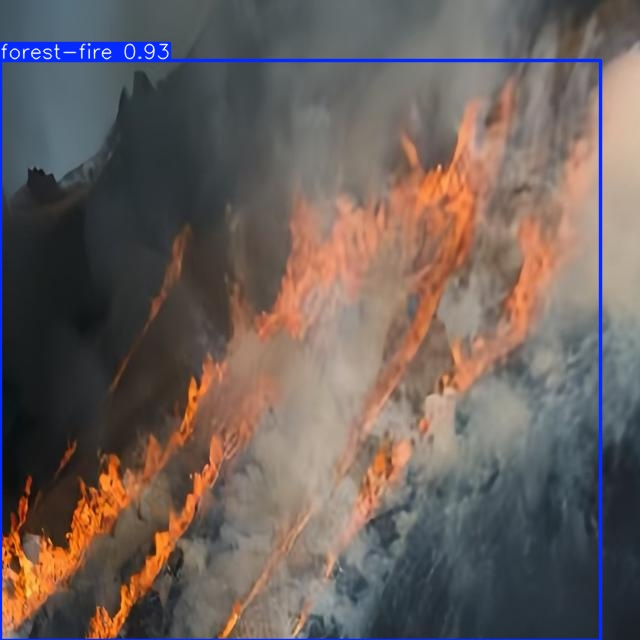

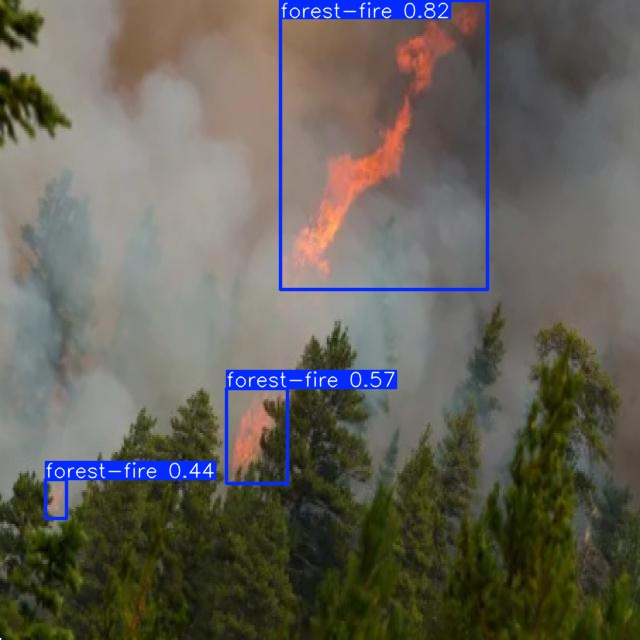

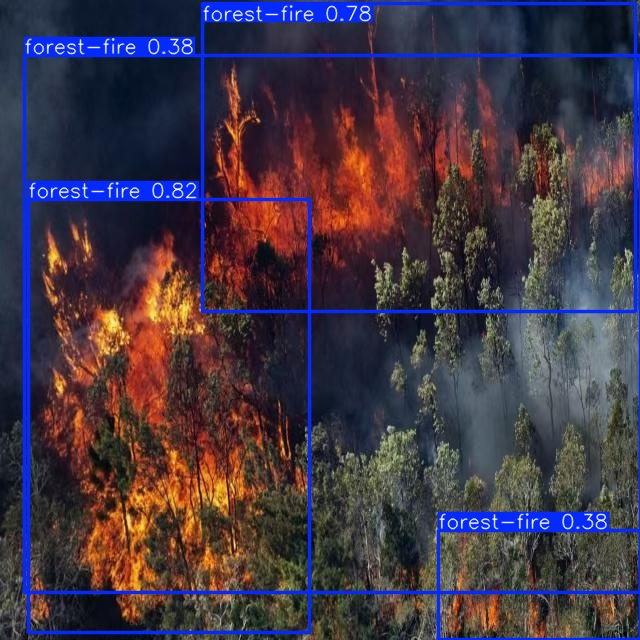

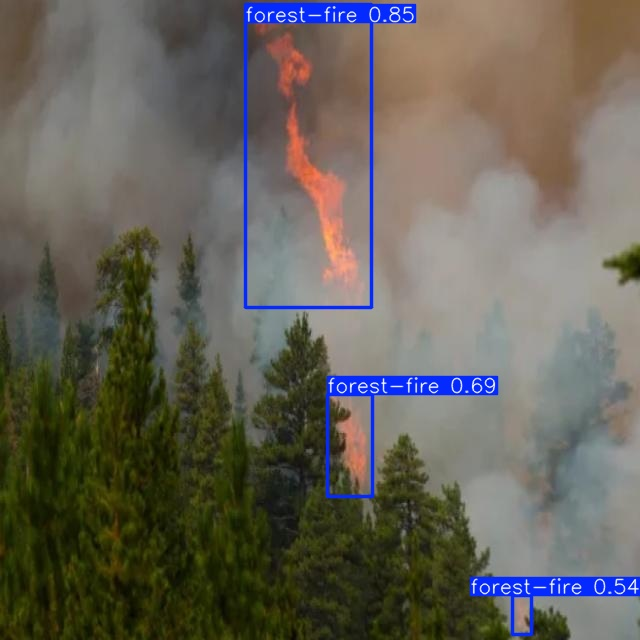

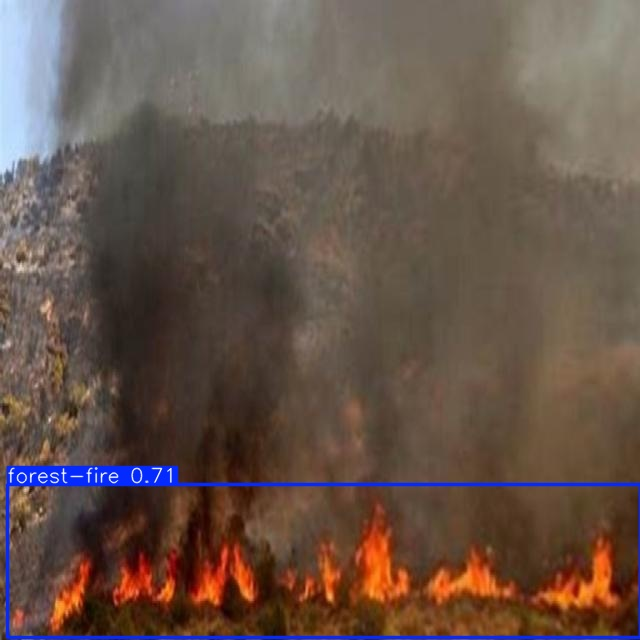

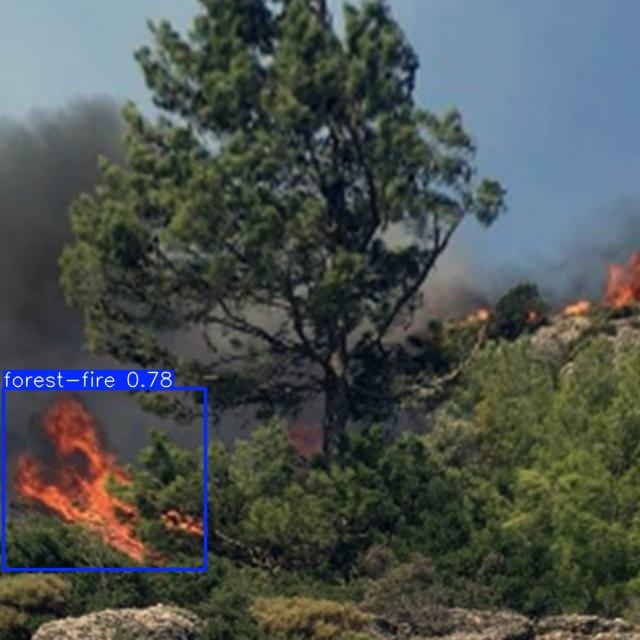

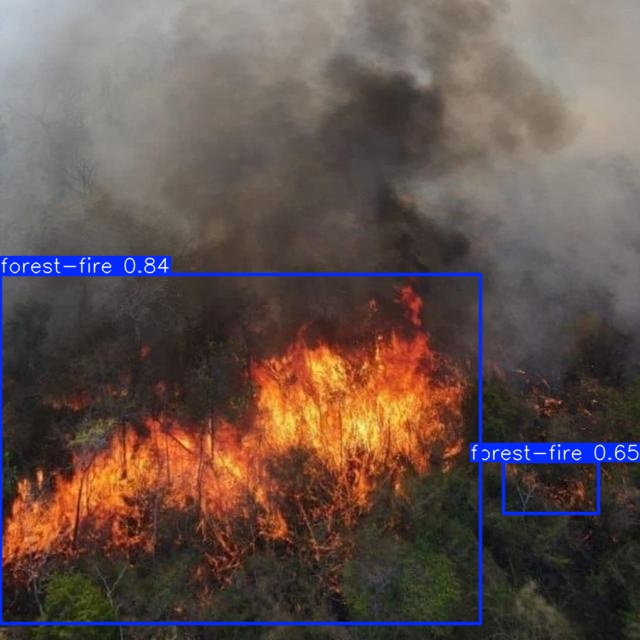

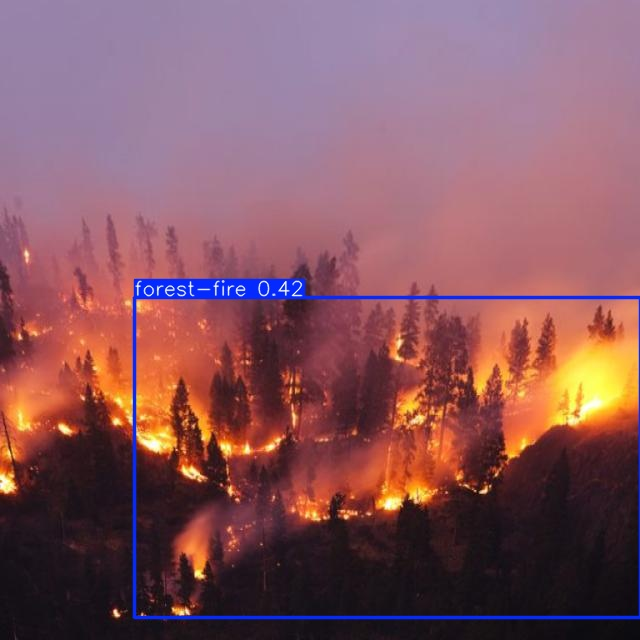

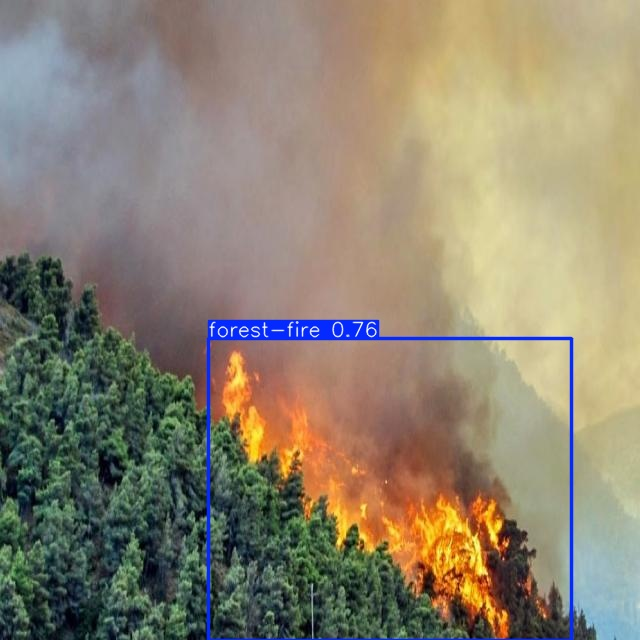

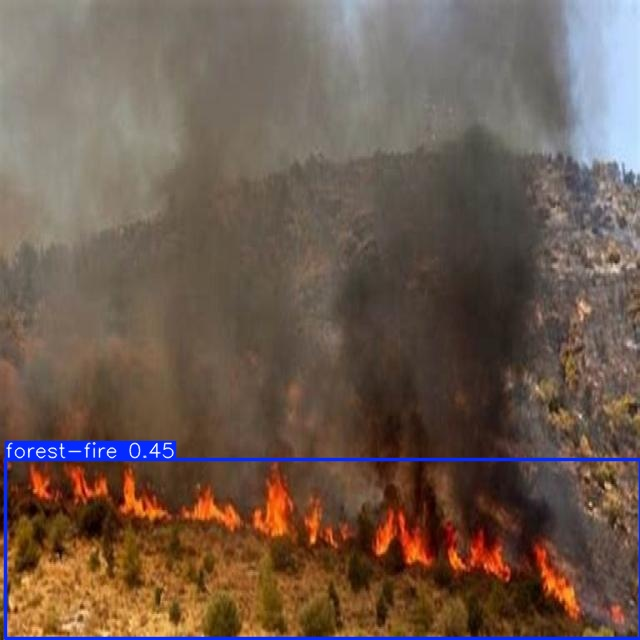

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict2/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")